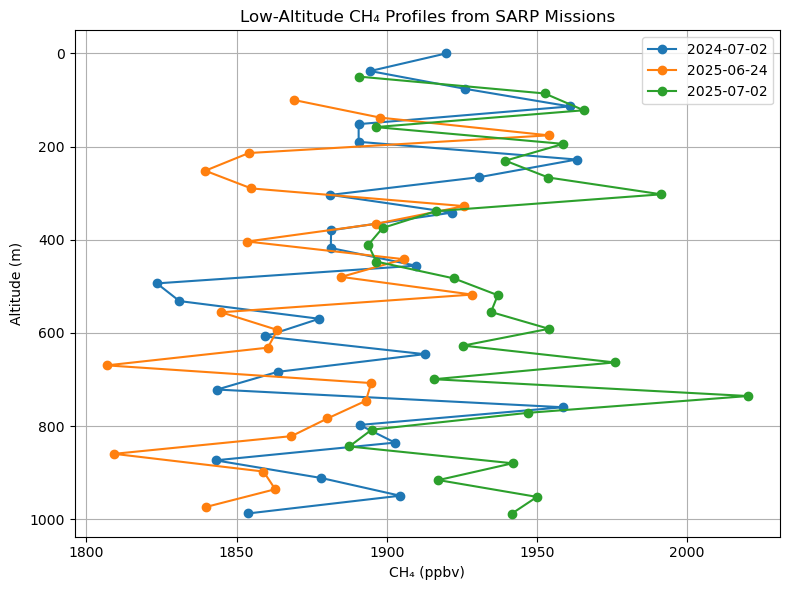

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate flight data for three missions
np.random.seed(42)

dates = ['2024-07-02'] * 80 + ['2025-06-24'] * 80 + ['2025-07-02'] * 80
altitudes = np.concatenate([
    np.linspace(0, 3000, 80),  # smooth vertical profile
    np.linspace(100, 3100, 80),
    np.linspace(50, 2900, 80)
])
ch4 = np.concatenate([
    np.random.normal(1900, 40, 80),
    np.random.normal(1880, 50, 80),
    np.random.normal(1925, 35, 80)
])
flight_data = pd.DataFrame({
    "Date": dates,
    "Altitude_m": altitudes,
    "CH4": ch4
})

# Filter for low-altitude (<1000 m)
low_altitude_data = flight_data[flight_data["Altitude_m"] < 1000]

# Plot vertical CH₄ profile for each date
fig, ax = plt.subplots(figsize=(8, 6))
for date in low_altitude_data['Date'].unique():
    subset = low_altitude_data[low_altitude_data['Date'] == date]
    ax.plot(subset['CH4'], subset['Altitude_m'], marker='o', label=date)

ax.invert_yaxis()
ax.set_xlabel("CH₄ (ppbv)")
ax.set_ylabel("Altitude (m)")
ax.set_title("Low-Altitude CH₄ Profiles from SARP Missions")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()
